In [23]:
pip install gluoncv

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install mxnet

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 33.1/33.1 MB 23.3 MB/s eta 0:00:00
     ---------------------------------------- 88.7/88.7 kB ? eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 133.4/133.4 kB ? eta 0:00:00
     -------------------------------------- 132.3/132.3 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 56.5/56.5 kB 1.5 MB/s eta 0:00:00
  Created wheel for numpy: filename=numpy-1.16.6-cp39-cp39-win_amd64.whl size=3665395 sha256=214c0a87a06893f68045f4740865f069dfcc393b6b9b2f8d64a8c4360316e20f
  Stored in directory: c:\users\sdash\appdata\local\pip\cache\wheels\ce\72\38\377a1055ac9b575ebba22e507856aecdc37f9bf6372703e5f9
Successfully built numpy
Note: you may need to restart the kernel 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
opencv-python 4.6.0.66 requires numpy>=1.17.3; python_version >= "3.8", but you have numpy 1.16.6 which is incompatible.
opencv-python 4.6.0.66 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.16.6 which is incompatible.
xarray 0.20.1 requires numpy>=1.18, but you have numpy 1.16.6 which is incompatible.
tensor

In [25]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import gluoncv
import tqdm
import cv2
import matplotlib.pyplot as plt
from utils import get_color_table, plot_one_box

import pandas as pd
# Read the coco.names file to get the target tag name
def read_class_names(class_name_path):
#dictionary type
    names = {}
    with open(class_name_path, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

class_name_path = 'coco.names'
# Num of training images: 117266
train_dataset = gluoncv.data.COCODetection(root='./', splits='instances_train2017')

# Num of validation images: 4952
#val_dataset = gluoncv.data.COCODetection('./',splits='instances_val2017')


# Getting names of the objects present in COCO dataset.
#names= pd.read_csv("coco.names")
#print("coco.names:",names.info())


names = read_class_names(class_name_path)
num_names = len(names)
color_table = get_color_table(num_names)

print(type(names))
print("coco.names:",names)
print(type(names.values()))
# Num of training images: 117266
print('Num of training images:', len(train_dataset))
#print('Num of validation images:', len(val_dataset))

In [ ]:
#Loading random image and it's respective label
train_image, train_label = train_dataset[100]

bounding_boxes = train_label[:, :4]


class_ids = np.squeeze(train_label[:, 4:5], axis = 1) 

name_strs = []
for i in range(len(class_ids)):
  name = names[class_ids[i]]
  name_strs.append(name)

print(class_ids)
print(name_strs)

# 
print(class_ids.shape)

img_ori = train_image.asnumpy()

for i in range(len(bounding_boxes)):
    print(bounding_boxes[i])
    x0, y0, x1, y1 = bounding_boxes[i]
    plot_one_box(img_ori, [x0, y0, x1, y1], label=names[class_ids[i]], color=color_table[class_ids[i]], line_thickness=2)

plt.imshow(img_ori)
plt.show()

In [ ]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd

# Read the coco.names file to get the target tag name
def read_class_names(class_name_path):
   
    names = {}
    with open(class_name_path, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names


class_name_path = 'coco.names'
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
names = read_class_names(class_name_path)

Id_counts={}
for k in range(80):
    Id_counts[names[k]]=0
print(Id_counts)

for i in tqdm(range(len(train_dataset))):
    train_image, train_label = train_dataset[i]
    bounding_boxes = train_label[:, :4]
    #class_ids = np.squeeze(val_label[:, 4:5], axis = 1)
   # An array of all target category indices for this image
    class_ids = np.squeeze(train_label[:, 4:5], axis = 1)
    for j in class_ids:
        Id_counts[names[j]]+=1
print(Id_counts)

# Id_counts = {'person': 262461, 'bicycle': 7113, 'car': 43866, 'motorbike': 8725, 'aeroplane': 5135, 'bus': 6069, 'train': 4571, 'truck': 9973, 'b

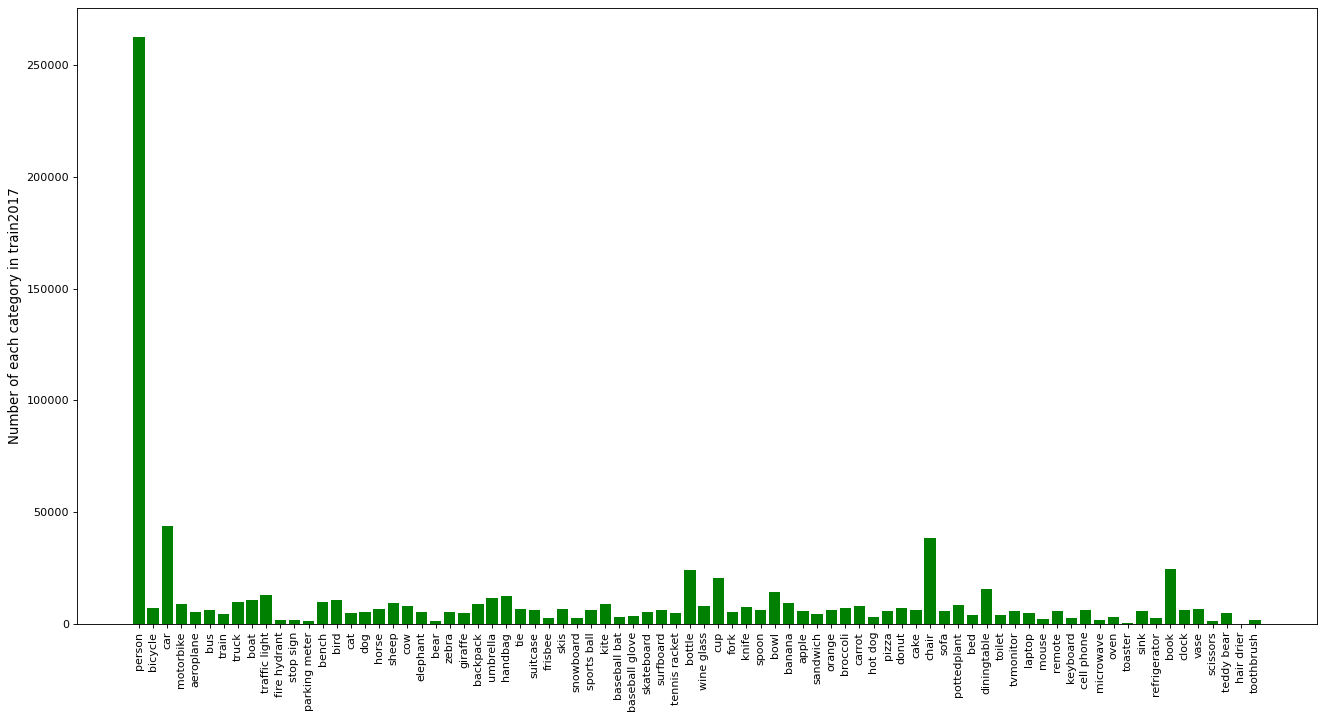

Statistical quantities of targets in each category: [262461, 7113, 43866, 8725, 5135, 6069, 4571, 9973, 10758, 12883, 1865, 1983, 1285, 9838, 10801, 4768, 5508, 6587, 9509, 8147, 5513, 1294, 5303, 5131, 8719, 11431, 12353, 6493, 6192, 2682, 6638, 2680, 6347, 9075, 3276, 3747, 5543, 6122, 4808, 24342, 7913, 20650, 5479, 7769, 6164, 14358, 9458, 5851, 4373, 6399, 7308, 7852, 2917, 5821, 7179, 6353, 38489, 5779, 8652, 4192, 15714, 4157, 5805, 4970, 2262, 5703, 2855, 6432, 1673, 3334, 225, 5610, 2637, 24713, 6334, 6613, 1481, 4793, 198, 1954]
All target stats:  859953


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Id_counts={'person': 262461, 'bicycle': 7113, 'car': 43866, 'motorbike': 8725, 'aeroplane': 5135, 'bus': 6069, 'train': 4571, 'truck': 9973, 'boat': 10758, 'traffic light': 12883, 'fire hydrant': 1865, 'stop sign': 1983, 'parking meter': 1285, 'bench': 9838, 'bird': 10801, 'cat': 4768, 'dog': 5508, 'horse': 6587, 'sheep': 9509, 'cow': 8147, 'elephant': 5513, 'bear': 1294, 'zebra': 5303, 'giraffe': 5131, 'backpack': 8719, 'umbrella': 11431, 'handbag': 12353, 'tie': 6493, 'suitcase': 6192, 'frisbee': 2682, 'skis': 6638, 'snowboard': 2680, 'sports ball': 6347, 'kite': 9075, 'baseball bat': 3276, 'baseball glove': 3747, 'skateboard': 5543, 'surfboard': 6122, 'tennis racket': 4808, 'bottle': 24342, 'wine glass': 7913, 'cup': 20650, 'fork': 5479, 'knife': 7769, 'spoon': 6164, 'bowl': 14358, 'banana': 9458, 'apple': 5851, 'sandwich': 4373, 'orange': 6399, 'broccoli': 7308, 'carrot': 7852, 'hot dog': 2917, 'pizza': 5821, 'donut': 7179, 'cake': 6353, 'chair': 38489, 'sofa': 5779, 'pottedplant': 8652, 'bed': 4192, 'diningtable': 15714, 'toilet': 4157, 'tvmonitor': 5805, 'laptop': 4970, 'mouse': 2262, 'remote': 5703, 'keyboard': 2855, 'cell phone': 6432, 'microwave': 1673, 'oven': 3334, 'toaster': 225, 'sink': 5610, 'refrigerator': 2637, 'book': 24713, 'clock': 6334, 'vase': 6613, 'scissors': 1481, 'teddy bear': 4793, 'hair drier': 198, 'toothbrush': 1954}

'''
	num: Window attribute id (window unique identity)
	figsize: window size
	dpi: window resolution
	facecolor: window background color
	edgecolor：window border color
'''
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(80), Id_counts.values(), width= 0.8,color='g')
plt.xticks(range(80),Id_counts.keys() , rotation=90)
plt.ylabel('Number of each category in train2017', fontsize='12')
plt.show()


#### Overall statistics: Because a picture may have multiple categories of targets, the total number is much more than the actual（ 859953 >> 117266）
# 
num_count = list(Id_counts.values())
print("Statistical quantities of targets in each category:", num_count)

total = 0
for i in range(80):
	total = total + int(num_count[i])
print('All target stats: ', total)

In [ ]:
import cv2
import os
import shutil
import gluoncv
from tqdm import tqdm_notebook as tqdm


def read_class_names(class_name_path):
   
    names = {}
    with open(class_name_path, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names


class_name_path = 'coco.names'
names = read_class_names(class_name_path)

# Num of training images: 117266
#train_dataset = gluoncv.data.COCODetection(root='./', splits='instances_train2017')

# Num of validation images: 4952
#val_dataset = gluoncv.data.COCODetection('./',splits='instances_val2014')

#714M(5000pictures)
#Id_counts={'person': 64115, 'bicycle': 3252, 'car': 12251, 'motorbike': 3502, 'aeroplane': 2986, 'bus': 3952, 'train': 3588, 'truck': 6127, 'boat': 3025, 'traffic light': 4139, 'fire hydrant': 1711, 'stop sign': 1734, 'parking meter': 705, 'bench': 5570, 'bird': 3236, 'cat': 4114, 'dog': 4385, 'horse': 2941, 'sheep': 1529, 'cow': 1968, 'elephant': 2143, 'bear': 960, 'zebra': 1916, 'giraffe': 2546, 'backpack': 5528, 'umbrella': 3968, 'handbag': 6841, 'tie': 3809, 'suitcase': 2402, 'frisbee': 2184, 'skis': 3080, 'snowboard': 1653, 'sports ball': 4262, 'kite': 2261, 'baseball bat': 2506, 'baseball glove': 2629, 'skateboard': 3476, 'surfboard': 3486, 'tennis racket': 3394, 'bottle': 8501, 'wine glass': 2533, 'cup': 9189, 'fork': 3555, 'knife': 4326, 'spoon': 3529, 'bowl': 7111, 'banana': 2243, 'apple': 1586, 'sandwich': 2365, 'orange': 1699, 'broccoli': 1939, 'carrot': 1683, 'hot dog': 1222, 'pizza': 3166, 'donut': 1523, 'cake': 2925, 'chair': 12774, 'sofa': 4423, 'pottedplant': 4452, 'bed': 3682, 'diningtable': 11837, 'toilet': 3353, 'tvmonitor': 4561, 'laptop': 3524, 'mouse': 1876, 'remote': 3076, 'keyboard': 2115, 'cell phone': 4801, 'microwave': 1547, 'oven': 2877, 'toaster': 217, 'sink': 4678, 'refrigerator': 2360, 'book': 5332, 'clock': 4659, 'vase': 3593, 'scissors': 947, 'teddy bear': 2140, 'hair drier': 189, 'toothbrush': 1007}
#Id_counts={'person': 88152, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 1445, 'bus': 2027, 'train': 1602, 'truck': 3338, 'boat': 3599, 'traffic light': 4362, 'fire hydrant': 650, 'stop sign': 686, 'parking meter': 512, 'bench': 3500, 'bird': 3955, 'cat': 1669, 'dog': 1952, 'horse': 2194, 'sheep': 3216, 'cow': 2841, 'elephant': 1863, 'bear': 462, 'zebra': 1886, 'giraffe': 1767, 'backpack': 2890, 'umbrella': 3979, 'handbag': 4116, 'tie': 2253, 'suitcase': 2244, 'frisbee': 935, 'skis': 2187, 'snowboard': 794, 'sports ball': 2218, 'kite': 2851, 'baseball bat': 1022, 'baseball glove': 1206, 'skateboard': 1710, 'surfboard': 2232, 'tennis racket': 1623, 'bottle': 8384, 'wine glass': 2638, 'cup': 7036, 'fork': 1776, 'knife': 2559, 'spoon': 2130, 'bowl': 4920, 'banana': 2925, 'apple': 1782, 'sandwich': 1461, 'orange': 2089, 'broccoli': 2697, 'carrot': 2684, 'hot dog': 1021, 'pizza': 2105, 'donut': 2540, 'cake': 2118, 'chair': 13133, 'sofa': 1927, 'pottedplant': 3077, 'bed': 1450, 'diningtable': 5244, 'toilet': 1463, 'tvmonitor': 2057, 'laptop': 1786, 'mouse': 851, 'remote': 1864, 'keyboard': 1028, 'cell phone': 2234, 'microwave': 539, 'oven': 1175, 'toaster': 78, 'sink': 1902, 'refrigerator': 888, 'book': 8560, 'clock': 2273, 'vase': 2267, 'scissors': 444, 'teddy bear': 1542, 'hair drier': 74, 'toothbrush': 634}
Id_counts={'person': 262461, 'bicycle': 7113, 'car': 43866, 'motorbike': 8725, 'aeroplane': 5135, 'bus': 6069, 'train': 4571, 'truck': 9973, 'boat': 10758, 'traffic light': 12883, 'fire hydrant': 1865, 'stop sign': 1983, 'parking meter': 1285, 'bench': 9838, 'bird': 10801, 'cat': 4768, 'dog': 5508, 'horse': 6587, 'sheep': 9509, 'cow': 8147, 'elephant': 5513, 'bear': 1294, 'zebra': 5303, 'giraffe': 5131, 'backpack': 8719, 'umbrella': 11431, 'handbag': 12353, 'tie': 6493, 'suitcase': 6192, 'frisbee': 2682, 'skis': 6638, 'snowboard': 2680, 'sports ball': 6347, 'kite': 9075, 'baseball bat': 3276, 'baseball glove': 3747, 'skateboard': 5543, 'surfboard': 6122, 'tennis racket': 4808, 'bottle': 24342, 'wine glass': 7913, 'cup': 20650, 'fork': 5479, 'knife': 7769, 'spoon': 6164, 'bowl': 14358, 'banana': 9458, 'apple': 5851, 'sandwich': 4373, 'orange': 6399, 'broccoli': 7308, 'carrot': 7852, 'hot dog': 2917, 'pizza': 5821, 'donut': 7179, 'cake': 6353, 'chair': 38489, 'sofa': 5779, 'pottedplant': 8652, 'bed': 4192, 'diningtable': 15714, 'toilet': 4157, 'tvmonitor': 5805, 'laptop': 4970, 'mouse': 2262, 'remote': 5703, 'keyboard': 2855, 'cell phone': 6432, 'microwave': 1673, 'oven': 3334, 'toaster': 225, 'sink': 5610, 'refrigerator': 2637, 'book': 24713, 'clock': 6334, 'vase': 6613, 'scissors': 1481, 'teddy bear': 4793, 'hair drier': 198, 'toothbrush': 1954}
# We will keep retaining_percentage% total images containing required objects.

retaining_percentage=100

# We will use Id_counts_mod to keep track count of images containing each object
Id_counts_mod={}
for k in range(80):
    Id_counts_mod[names[k]]=0

print(Id_counts_mod)

# filename:picture name
headstr = """\

    train_images
    %s	
    
        %d
        %d
        3
    
"""

objstr = """\
    
        %s
        
            %d
            %d
            %d
            %d
        
    
"""

tailstr = '''\

'''
# write xml file
def write_xml(xml_path,head, objs, tail):
    f = open(xml_path, "w")
    f.write(head)
    for obj in objs:
        f.write(objstr%(obj[0],obj[1],obj[2],obj[3],obj[4]))
    f.write(tail)

need_classID = [0,1,2,3,5,7]
k=0
imgFolder='train_images'
xmlFolder = 'train_xml'
for i in tqdm(range(len(train_dataset))):

  # save multiple objstr
    objs = []

    train_image, train_label = train_dataset[i]
    bounding_boxes = train_label[:, :4]
    class_ids = np.squeeze(train_label[:, 4:5], axis = 1)
    #class_ids = train_label[:, 4:5]
    #print(class_ids.shape)
    include = False
    
    #You can include/exclude any objects by changing below array.
    for j in [0,1,2,3,5,7]:
        # When the category is not human
        if j!=0:
            if j in class_ids:
                include=True
                break
        else:
            # When the category is human
            if j in class_ids:
                for g in [1,2,3,5,7]:
                    if g in class_ids:
                        include=True
                        break
                if(include):
                    break
                         
    if(include):
            imgPath = os.path.join(imgFolder, str(k)) +'.jpg'
            xmlPath = os.path.join(xmlFolder, str(k))+'.xml'
            
            # save Picture
            image = train_image.asnumpy()
            height, width = image.shape[:2]
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            cv2.imwrite(imgPath,image)

            # save the xml file
            index = 0
            #print(class_ids)
            #print(class_ids.shape)

            for j in class_ids: 
                if j in [0,1,2,3,5,7]:
                  # Number of targets for this category
                  Id_counts_mod[names[j]]+=1

                  class_name = names[j]
                  xmin, ymin, xmax, ymax = bounding_boxes[index]

                  obj = [class_name, xmin, ymin, xmax, ymax]
                  objs.append(obj)
                
                index = index + 1
            filename = str(k) + '.jpg'
            head=headstr % (filename, width, height)
            tail = tailstr
            write_xml(xmlPath, head, objs, tail)

            k+=1
print(Id_counts_mod)
#Statistical results of each category after interception:{'person': 73064, 'bicycle': 7113, 'car': 43866, 'motorbike': 8725, 'aeroplane': 0, 'bus': 6069, 'train': 0, 'truck': 9973, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator': 0, 'book': 0, 'clock': 0, 'vase': 0, 'scissors': 0, 'teddy bear': 0, 'hair drier': 0, 'toothbrush': 0}
     

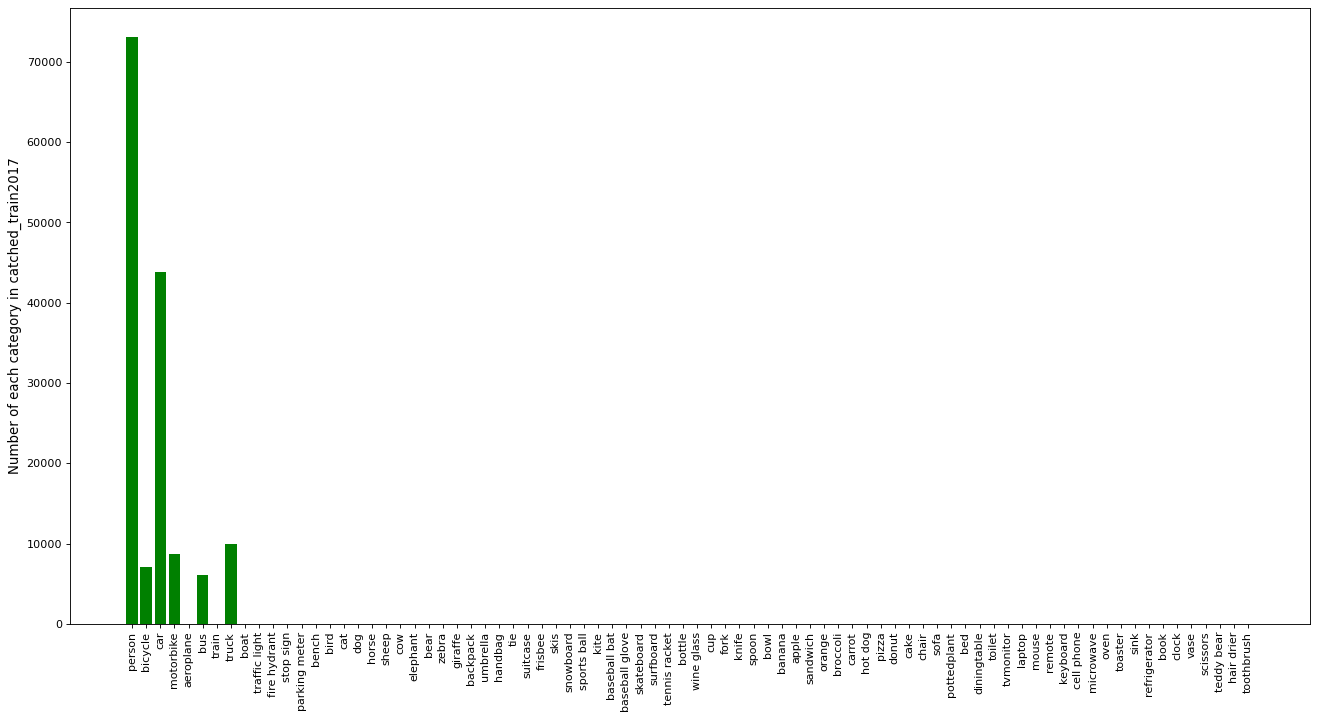

Statistics of targets in each category: [73064, 7113, 43866, 8725, 0, 6069, 0, 9973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
All target stats:  148810


In [34]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Id_catched_counts={'person': 73064, 'bicycle': 7113, 'car': 43866, 'motorbike': 8725, 'aeroplane': 0, 'bus': 6069, 'train': 0, 'truck': 9973, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator': 0, 'book': 0, 'clock': 0, 'vase': 0, 'scissors': 0, 'teddy bear': 0, 'hair drier': 0, 'toothbrush': 0}
'''
	num:Window attribute id (window unique identity)
	figsize: window size
	dpi: window resolution
	facecolor: window background color
	edgecolor：window border color
'''
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(80), Id_catched_counts.values(), width= 0.8,color='green')
plt.xticks(range(80),Id_catched_counts.keys() , rotation=90)
plt.ylabel('Number of each category in catched_train2017', fontsize='12')
plt.show()


#### Overall statistics: Because a picture may have multiple categories of targets, the total number is much more than the actual（ 342989 >> 117266）
# 
num_count = list(Id_catched_counts.values())
print("Statistics of targets in each category:", num_count)

total = 0
for i in range(80):
	total = total + int(num_count[i])
print('All target stats: ', total)